In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/DELL/Downloads/aircrashes-copy.csv")

In [3]:
df.sample()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
985,1974,Qtr 4,December,29,Guatemala,Lockheed 18,Lockheed 18 LodeStarTG HTM,Tikal Guatemala,Ortiz Edwin,0,24,24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [5]:
df['Country/Region'].unique()

array([nan, "'-", ' Alaska', '10', 'Afghanistan', 'Aichi', 'Alaska',
       'Algeria', 'Angola', 'Argentina', 'Australia', 'Azerbaijan',
       'Bahamas', 'Bali', 'Belgian', 'Black', 'Bolivia', 'Botswana',
       'Brazil', 'Brazil\tAmazonaves', 'British', 'Calabria',
       'California', 'Cameroon', 'Cameroons', 'Canada', 'Canary',
       'Channel', 'Chechnya', 'Chile', 'China', 'China?', 'Colombia',
       'Colorado', 'Congo', 'Croatia', 'Cyprus', 'Democratic', 'East',
       'Ecuador', 'England', 'Equatorial', 'Estonia', 'Ethiopia',
       'Finland', 'Florida', 'France', 'French', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Guangxi', 'Guatemala',
       'Guyana', 'Hawaii', 'Honduras', 'Hong', 'Idaho', 'India',
       'India\tPawan', 'Indiana', 'Indonesia', 'Iowa', 'Iran', 'Iraq',
       'Ireland', 'Isle', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kansas',
       'Kenya', 'Laos', 'Libya', 'London', 'Madagascar', 'Malta',
       'Mexico', 'Michigan', 'Moldova'

In [6]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace\
(r"[^A-Za-z0-9_]", "")


In [7]:
df['Country/Region'].unique()

array([nan, "'-", ' Alaska', '10', 'Afghanistan', 'Aichi', 'Alaska',
       'Algeria', 'Angola', 'Argentina', 'Australia', 'Azerbaijan',
       'Bahamas', 'Bali', 'Belgian', 'Black', 'Bolivia', 'Botswana',
       'Brazil', 'Brazil\tAmazonaves', 'British', 'Calabria',
       'California', 'Cameroon', 'Cameroons', 'Canada', 'Canary',
       'Channel', 'Chechnya', 'Chile', 'China', 'China?', 'Colombia',
       'Colorado', 'Congo', 'Croatia', 'Cyprus', 'Democratic', 'East',
       'Ecuador', 'England', 'Equatorial', 'Estonia', 'Ethiopia',
       'Finland', 'Florida', 'France', 'French', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Guangxi', 'Guatemala',
       'Guyana', 'Hawaii', 'Honduras', 'Hong', 'Idaho', 'India',
       'India\tPawan', 'Indiana', 'Indonesia', 'Iowa', 'Iran', 'Iraq',
       'Ireland', 'Isle', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kansas',
       'Kenya', 'Laos', 'Libya', 'London', 'Madagascar', 'Malta',
       'Mexico', 'Michigan', 'Moldova'

In [8]:
df["Country/Region"] = df["Country/Region"].fillna("Unspecified")
df["Operator"] = df["Operator"].fillna("Unspecified")


In [9]:
df['Country/Region'].unique()

array(['Unspecified', "'-", ' Alaska', '10', 'Afghanistan', 'Aichi',
       'Alaska', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Azerbaijan', 'Bahamas', 'Bali', 'Belgian', 'Black', 'Bolivia',
       'Botswana', 'Brazil', 'Brazil\tAmazonaves', 'British', 'Calabria',
       'California', 'Cameroon', 'Cameroons', 'Canada', 'Canary',
       'Channel', 'Chechnya', 'Chile', 'China', 'China?', 'Colombia',
       'Colorado', 'Congo', 'Croatia', 'Cyprus', 'Democratic', 'East',
       'Ecuador', 'England', 'Equatorial', 'Estonia', 'Ethiopia',
       'Finland', 'Florida', 'France', 'French', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Guangxi', 'Guatemala',
       'Guyana', 'Hawaii', 'Honduras', 'Hong', 'Idaho', 'India',
       'India\tPawan', 'Indiana', 'Indonesia', 'Iowa', 'Iran', 'Iraq',
       'Ireland', 'Isle', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kansas',
       'Kenya', 'Laos', 'Libya', 'London', 'Madagascar', 'Malta',
       'Mexico', 'Michigan',

In [10]:
# Dictionary of corrections
country_corrections = {
    # "Usa": "USA",
    # "United States": "USA",
    # "Uk": "United Kingdom",
    # "Ussr": "Russia",
    # "Unknown": "Unknown",   
   #  "Can": "Canada",
    ######################
    ' Alaska':'Alaska',
    'Belgian':'Belgium',
    'Brazil/tAmazonaves':'Brazil',
    'British':'Britain',
    'Cameroons':'Cameroon',
    
    'China?':'China',
    'Democratic':'DRC',
    'Equatorial':'Equitorial Guinea',
    'French':'France',
    'Hong':'Hong Kong',
    'India\tPawan':'India',
    'near':'California',
    'New':'New York',
    'North':'North Korea',
    'Northern':'Northern Ireland',
    'Norway\tCHC':'Norway',
    'ON':'Ontario Canada',
    'Papua':'Papua New Guinea',
    'Puerto':'Puerto Rico',
    'Saudi':'Saudi Arabia',
    'SK':'Canada',
    'South-West':'South Africa',
    'Sri':'Sri Lanka',
    'Tennesee':'Tennessee',
    'USSRAeroflot':'Russia',
    '100':'Unknown',
    'BC':'British Columbia Canada',
    'Bias':'China',
    'Brazil\tLoide':'Brazil',
    'miles':'Miles',
    'Spain\r\n\t\r\nMoron':'Spain',
    'United':'UAE',
    'Airlines':'Unknown',
    'Coloado':'Colorado',
    'D.C.Capital':'Washington DC',
    'Florida?':'Florida',
    'off':'Angola',
    'The':'Netherlands',
    'Argentinade':'Argentina',
    'California?':'California',
    'D.C.Air':'Florida',
    'El':'El Salvador',
    'Indonesia\r\n\t\r\nSarmi':'Indonesia',
    'NSW':'Australia',
    'UARMisrair':'EgyptAir (UAR era)',
    'Minnesota46826/109':'Minnesota',
    'Qld':'Australia',
    'U.S.':'United States',
    '325':'Unspecified',
    '110':'Unspecified',
    '116':'Unspecified',
    '18':'Unspecified',
    '570':'Unspecified',
    'Germany?':'Germany',
    'Azerbaijan\r\n\t\r\nBakou':'Azerbaijan',
    'USSRBalkan':'Balkan Bulgarian Airlines (USSR era)',
    'Brazil\r\nFlorianopolis':'Brazil',
    'Chile\tAerolineas':'Chile',
    'Honduras?':'Honduras',
    'US':'United States',
    'Afghanstan':'Afghanistan',
    'USSRMilitary':'USSR Military Aviation',
    '800':'Unknown',
    'Tajikistan\tMilitary':'Tajikistan',
    'USSRAerflot':'Russia',
    'Djibouti\r\n\tDjibouti':'Dijibouti',
    'France?':'France',
    'UAEGulf':'UAE',
    'Virginia.American':'Virginia America',
     "'-":'Unspecified',
    '10':'Unspecified',
    'Unkown':'Unspecified'

}


df["Country/Region"] = df["Country/Region"].replace(country_corrections)


In [11]:
df['Country/Region'].unique()

array(['Unspecified', 'Alaska', 'Afghanistan', 'Aichi', 'Algeria',
       'Angola', 'Argentina', 'Australia', 'Azerbaijan', 'Bahamas',
       'Bali', 'Belgium', 'Black', 'Bolivia', 'Botswana', 'Brazil',
       'Brazil\tAmazonaves', 'Britain', 'Calabria', 'California',
       'Cameroon', 'Canada', 'Canary', 'Channel', 'Chechnya', 'Chile',
       'China', 'Colombia', 'Colorado', 'Congo', 'Croatia', 'Cyprus',
       'DRC', 'East', 'Ecuador', 'England', 'Equitorial Guinea',
       'Estonia', 'Ethiopia', 'Finland', 'Florida', 'France', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guangxi',
       'Guatemala', 'Guyana', 'Hawaii', 'Honduras', 'Hong Kong', 'Idaho',
       'India', 'Indiana', 'Indonesia', 'Iowa', 'Iran', 'Iraq', 'Ireland',
       'Isle', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kansas', 'Kenya',
       'Laos', 'Libya', 'London', 'Madagascar', 'Malta', 'Mexico',
       'Michigan', 'Moldova', 'Mongolia', 'Morocco', 'Netherlands',
       'Nevada', 'New Yo

In [12]:
# Dictionary of corrections for Aircraft manufacturers
manufacturer_corrections = {
    "Doublas": "Douglas",
    "MD Douglas": "McDonnell Douglas",
    "Mc Donnell Douglas": "McDonnell Douglas",
    "De Havilland": "de Havilland",
    "de Havilland  Canada": "De Havilland Canada",
    "Hadley Page 137Jetstream I": "Handley Page Jetstream",
    "Lisnov": "Lisunov",
    "C": "Cessna",
    "Fokke": "Focke-Wulf",
    "B17G Flying": "Boeing B-17G Flying Fortress",
    "Lockheed 14 Super": "Lockheed 14 Super Electra",
    "Lockheed 188C": "Lockheed L-188C Electra",
    "Aerospatiale Caravelle": "Aérospatiale Caravelle",
    "OFM": "OFM Aircraft",
    "??": "Unknown",
    "Swallow?": "Swallow",
    "Embraer 110EJ Band./Embraer 110P": "Embraer 110 Bandeirante",
    "Embraer 110P1": "Embraer 110 Bandeirante",
    "Pilatus Britten Norman": "Pilatus Britten-Norman",
    "NAMC": "Nihon Aircraft Manufacturing Corporation",
    "Britten Norman": "Britten-Norman",
    "Lockheed Super": "Lockheed Super Constellation",
    "Lockheed 14": "Lockheed Model 14",
    "Lockheed 18": "Lockheed Model 18 Lodestar",
    "Lockheed Hudson": "Lockheed Hudson",
    "Vickers 610 Viking": "Vickers Viking 610",
    "Vickers Viking 1B & Soviet": "Vickers Viking 1B",
    "Vickers Valetta": "Vickers Valetta",
    "Vickers Viscount": "Vickers Viscount",
    "Vickers Wellington": "Vickers Wellington",
    "Vickers Vanguard": "Vickers Vanguard",
    "Avro 685 York": "Avro 685 York",
    "Avro Shackleton": "Avro Shackleton",
    "Handley Page": "Handley Page",
    "Hawker Siddeley HS": "Hawker Siddeley",
    "Hawker Siddeley Trident": "Hawker Siddeley Trident",
    "British Aerospace BAe": "British Aerospace",
    "British Aerospace BAe": "British Aerospace",
    "Cams": "CAMS",
    "Hadley Page": "Handley Page",
    "Messerschmidt": "Messerschmitt",
    "Pilgrim": "Fairchild Pilgrim",
    "Aerocomp Comp Air": "Aerocomp Comp Air",
    "Eurocopter EC225LP Super Puma M2+": "Eurocopter EC225LP Super Puma",
    "Bell 212FAC": "Bell 212",
    "Bell 205": "Bell 205",
    "Bell": "Bell",
    "Stearman": "Stearman Aircraft",
    "Stinson Model": "Stinson",
    "Farman": "Farman Aviation Works",
    'Swallow\r\nSwallow?':'Swallow',
    'Sikorsky S43 (flying':'Sikorsky S43 (flying)',
    'Unknown /':'Unknown',
    'Short Sandringham (flying':'Short Sandringham (flying)',
    'Avro 691 Lancastrian (flying':'Avro 691 Lancastrian (flying)',
    'Short Sandringham 5 (flying':'Short Sandringham 5 (flying)',
    'Latécoère 23 (flying':'Latécoère 23 (flying)',
    'Latécoère 300 (float':'Latécoère 300 (float)',
    'Latecoere 301 (flying':'Latecoere 301 (flying)',
    'Helicopter?':'Helicopter',
    'Short Sandringham 2 (flying':'Short Sandringham 2 (flying)',
    'CMASA Wal (flying':'CMASA Wal (flying)',
    'Fairchild packet (C119 flying':'Fairchild packet (C119 flying)',
    'Domier Delphin III (flying':'Domier Delphin III (flying)',
    'Airship?':'Airship',
    'Latecoere 631 (sea':'Latecoere 631 (sea)',
    'Aeromarine Model 85 (flying':'Aeromarine Model 85 (flying)',
    'Vickers Viscount 745D /':'Vickers Viscount 745D',
    'Stinson?':'Stinson',
    '?42':'42',
    '?VP':'VP',
    'Short Calcutta (flying':'Short Calcutta (flying)',
    'Rutan Long EZ (experimental':'Rutan Long EZ (experimental)',
    'Hawker Siddeley Trident 2E /':'Hawker Siddeley Trident 2E'

}


df["Aircraft_Manufacturer"] = df["Aircraft_Manufacturer"].replace(manufacturer_corrections)

In [13]:
df["Aircraft_Manufacturer"] = df["Aircraft_Manufacturer"].replace("?", " ")

In [14]:
df['Aircraft_Manufacturer'].unique()

array(['de Havilland Canada', 'Douglas', 'Vickers Vanguard', 'Antonov',
       'Boeing', 'Airbus', 'Aero Commander', 'Britten', 'Cessna',
       'Cessna 208B Caravan', 'Hughes', 'McDonnell Douglas',
       'Fairchild Pilgrim', 'Ilyushin', 'Cessna  208B Grand',
       'Hawker Siddeley', 'HS', 'Avro', 'Lockheed Model 14',
       'Swearingen SA227AC Metroliner', 'Yakovlev', 'Curtiss', 'Mil',
       'Convair', 'Consolidated', 'Embraer 110 Bandeirante', 'Learjet',
       'Nihon Aircraft Manufacturing Corporation', 'Embraer/Piper',
       'Lockheed Model 18 Lodestar', 'CAMS', 'Ford', 'Grumman',
       'Lockheed', 'de Havilland', 'Mi', 'Pilatus', 'Sikorsky', 'Unknown',
       'Aérospatiale', 'Bell 212',
       'Hadley Page 137Jetstream I / Cessna 206N11360 /', 'Canadair',
       'Bristol Britannia', 'Fokker', 'Junkers', 'Sud Aviation',
       'Vickers Viscount', 'Avro 685 York', 'Avro Shackleton',
       'Vickers Viking 610', 'BAC Super', 'Aerocomp Comp Air',
       'Fairchild', 'Farman Aviat

In [15]:
df.head(10)

,Year,Quarter,Month,Day,Country/Region,Aircraft_Manufacturer,Aircraft,Location,Operator,Ground,Fatalities_(air),Aboard
0,1970,Qtr 2,April,28,Unspecified,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,Unspecified,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,Unspecified,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,Unspecified,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,Unspecified,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12
5,1960,Qtr 2,April,14,Unspecified,Douglas,Douglas DC 4?,Taipei -,Force Air Thai Royal,0,18,18
6,2024,Qtr 2,April,23,Alaska,Douglas,Douglas C-54D Skymaster N3054V,Near Fairbanks,Alaska Air Fuel,0,2,2
7,1958,Qtr 2,April,21,Unspecified,Douglas,Douglas DC 7 / F,Near Sloan 10,Nevada Vegas Las of SW miles United Air L...,0,49,49
8,1997,Qtr 2,April,23,Afghanistan,Antonov,Antonov AN 26?,Near Konduz Afghanistan,Force Air Republican Afghan - Military,0,36,36
9,1988,Qtr 2,April,10,Afghanistan,Antonov,Antonov AN 26?,Near Mazâr-e Charif Afghanistan,Force Air Republican Afghan - Military,0,29,29


In [16]:
df['Aircraft'].unique()

array(['de Havilland Canada DHC 6 Twin Otter 100VH', 'Douglas DC 3VT',
       'Vickers Vanguard 952G AXOP', ...,
       'Handley Page Dart Herald 2029Q CAH', 'Lockheed Hercules C 1309T',
       'Douglas DC 6BSE'], dtype=object)

In [17]:
# Dictionary of corrections for Aircraft
aircraft_corrections = {
        "Douglas DC 4?": "Douglas DC-4",
    "Doublas Dc 3?": "Douglas DC-3",
    "Antonov AN 26?": "Antonov An-26",
    "Antonov AN 32?": "Antonov An-32",
    "Mi  8 helicopter?": "Mil Mi-8",
    "Mi  8?": "Mil Mi-8",
    "Mil Mi 8?": "Mil Mi-8",
    "Curtiss seaplane?": "Curtiss Seaplane",
    "Zeppelin L 59 (airship)?": "Zeppelin LZ 59",
    "Curtiss C 46 Commando?": "Curtiss C-46 Commando",
    "??": "Unknown",
    "?VH  TAT": "Unknown",
    "\"Swallow\nSwallow?\"": "Swallow",
    "Zeppelin L 70 (airship)?": "Zeppelin L 70 (airship)",
    "UH  60 Blackhawk helilcopter?": "UH-60 Black Hawk helicopter",
    "Caproni Ca.48?": "Caproni Ca.48",
    "Unknown / Unknown?": "Unknown",
    "Antonov AN 22?": "Antonov AN 22",
    "Siebel Si 204?": "Siebel Si 204",
    "Zeppelin L 23 (airship)?": "Zeppelin L 23 (airship)",
    "Lockheed 18 56 Lodestar?": "Lockheed 18-56 Lodestar",
    "Consolidated B 24?": "Consolidated B-24",
    "Mc Donnell Dougals DC 9?": "McDonnell Douglas DC-9",
    "Fokker Universal F 14?": "Fokker Universal F-14",
    "Douglas C47?": "Douglas C-47",
    "Dirigible Roma (airship)?": "Dirigible Roma (Airship)",
    "Mil Mi 17?": "Mil Mi-17",
    "Helicopter?": "Helicopter (Unspecified)",
    "Douglas DC 3?": "Douglas DC-3",
    "Curtiss C 46?": "Curtiss C-46",
    "Lisunov Li 2?": "Lisunov Li-2",
    "Black Hawk helicopter?": "Sikorsky UH-60 Black Hawk",
    "Mil Mi 8 (helicopter)?": "Mil Mi-8 Helicopter",
    "Mil Mi 8 / Mil Mi": "Mil Mi-8",
    "Douglas C 47?": "Douglas C-47",
    "Fairchild packet (C119 flying boxcar)?": "Fairchild C-119 Flying Boxcar",
    "Farman F 40?": "Farman F.40",
    "Tupolev ANT 9?": "Tupolev ANT-9",
    "Mi  17?": "Mil Mi-17",
    "Boeing RC 135E?": "Boeing RC-135E",
    "Douglas DC 5?": "Douglas DC-5",
    "PBY Catalina?": "Consolidated PBY Catalina",
    "KJ  2000?": "KJ-2000",
    "FD Type Dirigible?": "Dirigible (Type FD)",
    "Pitcairn PA 6 Mailwing?": "Pitcairn PA-6 Mailwing",
    "LVG C VI?": "LVG C.VI",
    "Sukhoi Su 2742": "Sukhoi Su-27 (42)",
    "Loening C W Air Yaht?": "Loening CW Air Yacht",
    "?NC21V": "NC21V",
    "Mil Mi 8T (helicopter)?": "Mil Mi-8T helicopter",
    "Douglas DC 3 (C": "Douglas DC-3",
    "Douglas DC C": "Douglas DC-3",
    "Five Grumman TBM Avengers?": "Grumman TBM Avenger (5 units)",
    "Antonov AN 12?": "Antonov An-12",
    "Fairchild Pilgrim 100A?": "Fairchild Pilgrim 100A",
    "KB  50?": "Boeing KB-50",
    "Boeing Vertol CH 47 (helicopter)?": "Boeing Vertol CH-47 Chinook",
    "Boeing Vertol CH 47 (helilcopter)?": "Boeing Vertol CH-47 Chinook",
    "Fairchild C 123?": "Fairchild C-123 Provider",
    "Fairchild?": "Fairchild (unspecified model)",
    "Twin Apache?": "Curtiss-Wright XP-60 'Twin Apache'",
    "Ilyushin II 14?": "Ilyushin Il-14",
    "Lockheed 18 08 Lodestar	N410M": "Lockheed 18-08 Lodestar N410M",
    "Lockheed 049 ConsellationNC86505": "Lockheed 049 Constellation NC86505",
    "MI 172 V5 helicopter?": "Mil Mi-172 (helicopter)",
    "Zeppelin L 43 (airship)?": "Zeppelin LZ-43 (airship)",
    "L  Hudson?": "Lockheed Hudson",
    "Fairchild C 199G?": "Fairchild C-119G",
    "Pitcairns PA 6?": "Pitcairn PA-6",
    "Aeromarine Model 85 (flying boat)?": "Aeromarine Model 85 (flying boat)",
    "McDonnel F 4E Phantom II?": "McDonnell F-4E Phantom II",
    "Sepecat Jaguar A?": "SEPECAT Jaguar A",
    "Junkers JU 86?": "Junkers Ju-86",
    "?139": "Unknown",
    "Airship?": "Airship",
    "C  46?": "Curtiss C-46",
    "H  21B?": "Piasecki H-21B",
    "MiG  23?": "Mikoyan-Gurevich MiG-23",
    "MiG  15 UTI?": "Mikoyan-Gurevich MiG-15 UTI",
    "Douglas C 54 Skymaster?": "Douglas C-54 Skymaster",
    "Douglas C 54?": "Douglas C-54",
    "Stinson?": "Stinson",
    "Zeppelin L 22 (airship)?": "Zeppelin L-22 (airship)",
    "Super Zeppelin (airship)?": "Zeppelin (Super airship)",
    "Zeppelin L 34 (airship)?": "Zeppelin L-34 (airship)",
    "Ilyushin IL 18?": "Ilyushin Il-18",
    "Kalinin K 7?": "Kalinin K-7",
    "Boeing Vertol CH47A (helicopter)?": "Boeing Vertol CH-47A (helicopter)",
    "?42  52196": "Douglas C-42 52196",
    "Budd RB 1 Conestoga?": "Budd RB-1 Conestoga",
    "Li  2 / Li": "Lisunov Li-2",
    "Lockheed Hudson?": "Lockheed Hudson",
    "Tempest?": "Hawker Tempest",
    "Ford Tri motor 5?": "Ford Trimotor 5",
    "Douglas A 3D Skywarrior?": "Douglas A-3D Skywarrior",
    "De Havilland DH 4?": "de Havilland DH-4",
    "Zeppelin L 31 (airship)?": "Zeppelin L-31 (Airship)"
}


df["Aircraft"] = df["Aircraft"].replace(aircraft_corrections)

In [18]:
df['Aircraft'].unique()

array(['de Havilland Canada DHC 6 Twin Otter 100VH', 'Douglas DC 3VT',
       'Vickers Vanguard 952G AXOP', ...,
       'Handley Page Dart Herald 2029Q CAH', 'Lockheed Hercules C 1309T',
       'Douglas DC 6BSE'], dtype=object)

In [19]:
df['Location'].nunique()

4170

In [20]:
# Dictionary of corrections for Location
location_corrections = {
    "Shanghi China": "Shanghai China",
    "Ningpo Bay China": "Ningbo Bay China",
    "Near Shensi China?": "Near Shaanxi China",
    "Pao Ting Fou China?": "Baoding (Pao Ting Fu) China",
    "Baranquilla Colombia": "Barranquilla Colombia",
    "Rio de Janerio Brazil": "Rio de Janeiro Brazil",
    "Near Belem Brazil\tLoide": "Near Belem Brazil (Loide)",
    "Manaus Brazil\tAmazonaves": "Manaus Brazil (Amazonaves)",
    "Coen Australila": "Coen Australia",
    "Sorta Norway\tCHC": "Sortland Norway (CHC)",
    "Russian Mission Alaksa": "Russian Mission Alaska",
    "Tamanraset Algeria": "Tamanrasset Algeria",
    "Near Konigs Wusterausen East": "Near Königs Wusterhausen East Germany",
    "Sagone India": "Sangone India",
    "Jirkouk Iraq": "Kirkuk Iraq",
    "Near Alma-Ata Kazakastan": "Near Alma-Ata Kazakhstan",
    "Chrisinau Moldova": "Chisinau Moldova",
    "Ixtaccihuati Mexico": "Iztaccihuatl Mexico",
    "Cerro Lilio Mexico": "Cerro del Lilio Mexico",
    "Benito Bolivia": "Beníto Bolivia",
    "Colorado Bolivia": "Colorada Bolivia",
    "Kupe Mountains Cameroons": "Kupe Mountains Cameroon",
    "Massamba Democratic": "Massamba Congo (Democratic Republic)",
    "Mugogo Democratic": "Mugogo Congo (Democratic Republic)",
    "Bukavu Democratic": "Bukavu Congo (Democratic Republic)",
    "Kongolo Democratic": "Kongolo Congo (Democratic Republic)",
    "Nganga Lingolo Congo": "Nganga Lingolo Congo (DRC)",
    "Bundeena Australia": "Bundeena New South Wales Australia",
    "Chilang Point Bias": "Chilang Point Bissau Guinea-Bissau",
    "Hangow China": "Hangzhou China",
    "Fort Hertz China": "Fort Hertz (Putao) Myanmar",
    "Wangmoon China": "Wangmo China",
    "Sakiya Saugye Japan": "Sakiyama Sogyo Japan",
    "Montnago Italy": "Montagnano Italy",
    "Off Stromboli Italy": "Near Stromboli Italy",
    "Near Ardinello di Amaseno Italy": "Near Ardielle di Amaseno Italy",
    "Kabassaak Turkey": "Kabasakal Turkey",
    "Zaporozhye Ukraine": "Zaporizhzhia Ukraine",
    "Belgrad Yugoslavia": "Belgrade Yugoslavia",
    "?Deutsche Lufthansa": "Deutsche Lufthansa",
    "Belgrade Yugosalvia": "Belgrade Yugoslavia",
    "Green Grove Florida?": "Green Grove Florida",
    "Nnear Albuquerque New": "Near Albuquerque New Mexico",
    "Wroctaw Poland": "Wroclaw Poland",
    "Nnear Yuzhno-Sakhalinsk Russia": "Near Yuzhno-Sakhalinsk Russia",
    "Near Havlien Pakistan": "Near Havellian Pakistan",
    "Preswick Scotland": "Prestwick Scotland",
    "Gazni Afghanistan": "Ghazni Afghanistan",
    "Kranoyarsk Russia": "Krasnoyarsk Russia",
    "Fond-du-Lac Saskatchewan": "Fond du Lac Saskatchewan",
    "Catherham Surrey": "Caterham Surrey",
    "Nurnberg Germany": "Nürnberg Germany",
    "Eubeoa Greece": "Euboea Greece",
    "Hati": "Haiti",
    "Mendotta Minnisota": "Mendota Minnesota",
    "Wisconson": "Wisconsin",
    "Off Venice California?": "Off Venice California",
    "Guaderrama Spain": "Guadarrama Spain",
    "UARMisrair": "UAR Misrair",
    "Horwich Lancs": "Horwich Lancashire",
    "Caravelas Bay Brazil": "Caravelas Brazil",
    "Lapadrera Colombia": "La Pedrera Colombia",
    "Gibraltar?": "Gibraltar",
    "Nnear Kuybyshev Russia": "Near Kuybyshev Russia",
    "Near Syktyvar Russia": "Near Syktyvkar Russia",
    "Khartoom Sudan": "Khartoum Sudan",
    "Near Rijeka Yugoslavia": "Near Rijeka Yugoslavia",
    '"Bakou Azerbaijan\n\t\nBakou"': "Baku Azerbaijan",
    "San Diego CADuncan": "San Diego CA",
    "Near Wawona Cailifornia": "Near Wawona California",
    "Nacias Nguema Equatorial": "Nacias Nguema Equatorial Guinea",
    "Off Rasal United": "Off Rasal United Kingdom",
    "Torysa Czechoslovakia": "Torysa Czechoslovakia",
    "Burbank Calilfornia": "Burbank California",
    "San Barbra Honduras?": "San Barbara Honduras",
    "Boston Massachutes": "Boston Massachusetts",
    "Near Cuidad de Valles Mexic": "Near Ciudad de Valles Mexico",
    "Zamboanga Philipines": "Zamboanga Philippines",
    "Near Amiens Picrdie": "Near Amiens Picardie",
    "Dearborn Minnesota": "Dearborn Michigan",
    "Near Walsenberg Colorado": "Near Walsenburg Colorado",
    "Off Mar del Plata Aregntina": "Off Mar del Plata Argentina",
    "Guatamala City  Guatemala": "Guatemala City Guatemala",
    "San Salvador El": "San Salvador El Salvador",
    "La Poyatta Colombia": "La Hoyada Colombia",
    "Stephenville Newfoundlandu.s.": "Stephenville Newfoundland U.S.",
    "Near Jalalogori West": "Near Jalalogori West",
    "Near Sarowbi Afghanistan": "Near Sarobi Afghanistan",
    "Near Bagram Afghanstan": "Near Bagram Afghanistan",
    "Luassingua Angola": "Luassingua Angola",
    "Techachapi Mountains California": "Tehachapi Mountains California",
    "Off Cape Mendocino CAMilitary": "Off Cape Mendocino CA Military",
    "Landsdowne House Canada": "Lansdowne House Canada",
    "Ste. Therese de Blainville Canada": "Sainte-Thérèse-de-Blainville Canada",
    "Near Petrich bulgaria": "Near Petrich Bulgaria",
    "Novia Scotia Canada": "Nova Scotia Canada",
    "Between Shanghi and Canton China": "Between Shanghai and Canton China",
    "Near Kindu Congo": "Near Kindu DR Congo",
    "Near Bugulumisa Congo": "Near Bugulma Congo",
    "Near Hasna Egypt": "Near Aswan Egypt",
    "Near Point Alert Ellesmere": "Near Alert Ellesmere",
    "Near Trevelez Granada": "Near Trevélez Granada",
    "Near Chiringa India": "Near Cherringa India",
    "Chiraz Iran": "Shiraz Iran",
    "Venice Italyde": "Venice Italy",
    "Abidjan Ivory": "Abidjan Ivory Coast",
    "Barskoon Kirghizia": "Barskoon Kyrgyzstan",
    "Almelund Minnisota": "Almelund Minnesota",
    "La Rache Morocco": "Larache Morocco",
    "Near Lonkin Myanmar": "Near Lonkin Burma (Myanmar)",
    "Over the Carribean SeaLACSA": "Over the Caribbean Sea LACSA",
    "Juvisy-sur-Orge France?": "Juvisy-sur-Orge France",
    "Isiro Democtratic": "Isiro Democratic Republic of Congo",
    "Near Nador Morroco": "Near Nador Morocco",
    "Centeral Afghanistan": "Central Afghanistan",
    "Kharkov. Ukraine Russia": "Kharkov Ukraine",
    "Georgian SSR USSRAerflot": "Georgian SSR USSR Aeroflot",
    "Gulf of Sivash USSRAeroflot": "Gulf of Sivash USSR Aeroflot",
    "Off St. Petersburg USSRAeroflot": "Off St. Petersburg USSR Aeroflot",
    "Petropavlosk USSRAeroflot": "Petropavlovsk USSR Aeroflot",
    "Near Leningrad USSRAeroflot": "Near Leningrad USSR Aeroflot",
    "Near Khabarovsk USSRAeroflot": "Near Khabarovsk USSR Aeroflot",
    "New York New":"New York"
}


df["Location"] = df["Location"].replace(location_corrections)

In [21]:
df['Location'].unique()

array(['Kainatu', 'Delhi', 'Near Basel', ...,
       'Near the Kwango River Zaire', 'Kindu Zaire', 'Ndola Zambia'],
      dtype=object)

In [22]:
df['Operator'].unique()

array(['Airlines Australia GuineaTrans New', 'Airways IndiaDeccan',
       '(UK) Airlines International SwitzerlandInvicta', ...,
       'Services Aero MMM', 'Zaïroise Aérienne Force - Military',
       'Sweden Transair'], dtype=object)

In [23]:
# Dictionary of corrections for Operators
operator_corrections = {
    "Airways??": "Airways",
    "N/A":"Unknown",
    "GuineaTrans New?": "Guinea Trans New",
    "Nevada      Vegas Las of SW miles United Air Lines /": "Nevada Las Vegas - United Air Lines",
    "Airlines Australia GuineaTrans New": "Airlines Australia - Guinea Trans New",
    "(UK) Airlines International SwitzerlandInvicta": "(UK) Airlines International - Switzerland Invicta",
    "Alaska Air Fuel": "Alaska Air (Fuel Service)",
    "USSRAeroflot": "USSR Aeroflot",
    "Airlines Airlines/Alliance Indian": "Airlines Alliance Indian",
    "Force Air OceanIndian": "Force Air Ocean Indian",
    "England Walcot Air Line": "England Walcott Air Line",
    "Airways) Nigeria by (chartered ArabiaNationair": "Airways Nigeria (chartered by Arabia Nationair)",
    "Amercia Air": "America Air",
    "Foundation Reasearch Purdue - GuineaPrivate": "Foundation Research Purdue - Guinea Private",
    "Airlines Duch Royal KLM": "Airlines Dutch Royal KLM",
    "Force Air US - Militiary": "Force Air US - Military",
    "GuineaAeroflot": "Guinea Aeroflot",
    "Inc. Flight InaguaAgape": "Inc. Flight Inagua Agape",
    "KarkinitskyAeroflot of": "Karkinitsky Aeroflot",
    "Italila Eurojet": "Italia Eurojet",
    "Ivorie CoastAir": "Ivory Coast Air",
    "Airlilnes LeoneParamount": "Airlines Leone Paramount",
    "Aviaition Ababeel": "Aviation Ababeel",
    "Airlines Dutch Royal NetherlandsKLM": "Airlines Dutch Royal Netherlands KLM",
    "UzbekistanAeroflot": "Uzbekistan Aeroflot",
    "Aéreo Taxi AéreoBahia Taxi AéreoBahia Taxi Bahia": "Aéreo Taxi Bahia",
    "Airways Overseas KongPacific": "Airways Overseas Hong Kong Pacific",
    "Service Mail Aerial JerseyUS": "Service Mail Aerial Jersey US",
    "Airways National Zealand ZealandNew": "Airways National New Zealand",
    "Canada Miami Aviaition/Air Manila": "Canada Miami Aviation / Air Manila",
    "Airways) Orient (Filipinas Fairways": "Airways Orient (Filipinas Fairways)",
    "Romane) Aeriene (Transporturile Tarom": "Romane Aeriene (Transporturile Tarom)",
    "Airlines ArabiaVnukovo": "Airlines Arabia Vnukovo",
    "LeoneHelicsa": "Leone Helicsa",
    "Azur VietnamAigle": "Azur Vietnam Aigle",
    "Vietnam) (South Vietnam VietnamAir": "South Vietnam Airlines",
    "Force Air Lankan Sri - LankaMilitary": "Force Air Sri Lankan - Military",
    "Force Air Royal - LankaMilitary": "Force Air Royal Sri Lanka - Military",
    "Airways EmiratesSterling Arab": "Airways Emirates Sterling Arab",
    "KingdomLoganair": "Kingdom Loganair",
    "Singapore Airllines": "Singapore Airlines",
    "Airways Guiena": "Airways Guinea",
    "Lines Air ElalatPhilippine of island Philippine the": "Lines Air El Alat Philippine of the Philippine Island",
    "Air Bay GuineaMilne New": "Air Bay Guinea Milne New",
    "Forces Air Army U.S. - GuineaMilitary": "Forces Air Army U.S. - Guinea Military",
    "Helicopter York  YorkNew": "Helicopter York New York",
    "Reederei Zeppelin JerseyDeutsche": "Reederei Zeppelin Jersey Deutsche",
    "Airlines Cargo JerseyRegina": "Airlines Cargo Jersey Regina",
    "Airways W JerseyFlying": "Airways W Jersey Flying",
    "Private / Airways YorkGreylock": "Private / Airways York Greylock",
    "Force Air U.S. - MexicoMilitary": "Force Air U.S. - Mexico Military",
    "Airlines Ukranian-Mediterranean": "Airlines Ukrainian-Mediterranean",
    "France Indian National Airlines": "Indian Airlines (France Mislabel)",
    "Air Western and Continental Trans": "Air Western & Continental Transport",
    "California          Angeles Continental Airlines": "California Los Angeles Continental Airlines",
    "Airlines VirginiaCapital": "Virginia Capital Airlines",
    "New York          York American Airlines": "New York American Airlines",
    "Airlines YorkMohawk": "Mohawk Airlines New York",
    "New York          York USAir": "New York USAir",
    "Airlines Western JerseyColonial": "Colonial Airlines Western Jersey",
    "Airlines JerseyCentral": "Central Jersey Airlines",
    "Airlines YorkContinental": "Continental Airlines New York",
    "African RepublicUnion Aeromaritime": "African Republic Union Aeromaritime Transport",
    "Aviati Mustang": "Mustang Aviation",
    "Force Air Argentine - RicaMilitary": "Argentine Air Force / Costa Rica Military (Mislabel)",
    "India          Bengal British Overseas Airways": "British Overseas Airways Bengal India",
    "England Bristop Aeroplane Company": "England Bristol Aeroplane Company",
    "USSRAeroflot / Soviet Air Force": "USSR Aeroflot / Soviet Air Force",
    "Aviation Cap Wehite": "Cap White Aviation",
    "Indiaèkoda (India) Ltd": "Indaèkoda (India) Ltd.",
    "Air Paukn": "Air Paukn (Possible Misspelling)",
    "York?": "York Airways (Unclear Entry)",
    "Nordchurchaid": "Nord Church Aid",
    "Charter - Aerocontroctors": "Aerocontractors Charter",
    "Flamence RicoAir": "Flamenco Air Puerto Rico",
    "Russian - /Military Aeroflot": "Aeroflot (Russian Military)",
    "Brazil          Paulo Total  Air Lines": "Total Air Lines São Paulo Brazil",
    "service guard border Kazakhstan - KazakistanMilitary": "Kazakhstan Border Guard Service - Military",
    "Airways HampshireNortheast": "Northeast Airlines (New Hampshire)",
    "Airways JerseySaturn": "Saturn Airways (NJ)",
    "CarolinaStratofreight": "Stratofreight (North Carolina)",
    "Indonesia          Sulawesi Eastindo": "Eastindo Aviation (Sulawesi, Indonesia)",
    "Flyveselksap Wideroe's": "Flyveselskap Widerøe",
    "Canada          Scotia MK Airlines": "Scotia MK Airlines Canada",
    "Aviation Costal": "Coastal Aviation",
    "Unied Kingdom Air Union": "United Kingdom Air Union",
    "Connection) (American Airlines Corporate": "American Airlines Corporate Connection",
    "Air Divi AntillesDivi": "Divi Divi Air (Netherlands Antilles)",
    "Airlines Dutch Royal IndiesKLM": "KLM Royal Dutch Airlines (Netherlands Indies)",
    "Corp. Aviation Paramount - Taxi JerseyAir": "Paramount Aviation Corp. - Air Taxi (NJ)",
    "Airways York YorkNew": "New York Airways",
    "Zealand New Freight ZealandAir": "New Zealand Air Freight",
    "Service Flying YorkChamberlin": "Chamberlin Flying Service (NY)",
    "WNBC - YorkPrivate": "WNBC Private Flight (NY)",
    "Airlines HampshireNortheast": "Northeast Airlines (New Hampshire)"
}


df["Operator"] = df["Operator"].replace(operator_corrections)

In [24]:
df['Operator'].unique()

array(['Airlines Australia - Guinea Trans New', 'Airways IndiaDeccan',
       '(UK) Airlines International - Switzerland Invicta', ...,
       'Services Aero MMM', 'Zaïroise Aérienne Force - Military',
       'Sweden Transair'], dtype=object)

In [25]:
df.sample(3)

,Year,Quarter,Month,Day,Country/Region,Aircraft_Manufacturer,Aircraft,Location,Operator,Ground,Fatalities_(air),Aboard
4268,1965,Qtr 4,October,27,England,Vickers Vanguard,Vickers Vanguard 951G APEE,London England,Airways European British,0,36,36
3058,1988,Qtr 1,March,4,France,Fairchild,Fairchild FH 227BF,Near Fontainebleau France,Transregional Arien Transport,0,23,23
4028,2001,Qtr 4,November,22,Pennsylvania,Learjet,Learjet 25BN5UJ,Pittsburgh Pennsylvania,Aviation Jet Universal,0,2,2


In [26]:
# In some cases, fatalities were greater than the number aboard (illogical).
# Such rows were removed.
df = df[df["Fatalities_(air)"] <= df["Aboard"]]

In [27]:
# reset index
df = df.reset_index(drop=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5026 non-null   int64 
 1   Quarter                5026 non-null   object
 2   Month                  5026 non-null   object
 3   Day                    5026 non-null   int64 
 4   Country/Region         5026 non-null   object
 5   Aircraft_Manufacturer  5026 non-null   object
 6   Aircraft               5026 non-null   object
 7   Location               5026 non-null   object
 8   Operator               5026 non-null   object
 9   Ground                 5026 non-null   int64 
 10  Fatalities_(air)       5026 non-null   int64 
 11  Aboard                 5026 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 471.3+ KB


## EDAs and Filters

In [29]:
df_copy = df.copy()

In [30]:
df_copy.to_csv("copied_dataset.csv", index=False)

In [31]:
df_copy['Location'].value_counts()

Location
Moscow Russia                  16
New York                       15
Manila Philippines             15
Rio de Janeiro Brazil          14
Cairo Egypt                    13
                               ..
Near Kindu Zaire                1
Near Uvira Zaire                1
Near the Kwango River Zaire     1
Kindu Zaire                     1
Ndola Zambia                    1
Name: count, Length: 4146, dtype: int64

In [32]:
df['Country/Region'].value_counts()

Country/Region
Russia                                  283
Unspecified                             239
Brazil                                  163
Colombia                                146
New York                                142
                                       ... 
Volcano                                   1
Balkan Bulgarian Airlines (USSR era)      1
Tasmania                                  1
Tanganyika                                1
Deleware                                  1
Name: count, Length: 483, dtype: int64

In [33]:
df['Aircraft_Manufacturer'].value_counts()

Aircraft_Manufacturer
Douglas                992
Boeing                 387
Antonov                284
Lockheed               211
de Havilland Canada    157
                      ... 
Let Aero                 1
CRDA CANT                1
Fokker Super             1
Cessna 441 Conquest      1
Wright                   1
Name: count, Length: 618, dtype: int64

In [34]:
df['Aircraft'].value_counts()

Aircraft
Boeing B 737                     73
Boeing B 727                     56
Boeing B 707                     51
McDonnell Douglas DC 9           42
Douglas C 47A                    39
                                 ..
Airbus A300B4 622RB               1
Aero Commander  520B5386N         1
Embraer 120RT  BrasiliaN270AS     1
Fokker F 12PH                     1
Vickers Viscount 701CG ANHC       1
Name: count, Length: 3506, dtype: int64

In [35]:
df['Operator'].value_counts()

Operator
Unspecified                                                                       232
Aeroflot                                                                          188
Force Air U.S. - Military                                                          92
Lufthansa Deutsche                                                                 57
France Air                                                                         56
                                                                                 ... 
Airlines Northern Munz                                                              1
Japan China Airlines (Taiwan)                                                       1
(leased) Government U.S.                                                            1
Nevada      Vegas Las of SW miles United Air Lines / Military - U.S. Air Force      1
Alaska Air (Fuel Service)                                                           1
Name: count, Length: 2622, dtype: int64

### EDAs

In [36]:
# 1. Year with highest accident
year_highest_accidents = df['Year'].value_counts().idxmax()

print("Year with highest accident: ", year_highest_accidents)

Year with highest accident:  1946


In [37]:
# 2. Correlation between number aboard and fatalities aboard
correlation_aboard_fatalities = df[['Aboard', 'Fatalities_(air)']].corr().iloc[0,1]
print("\nCorrelation between Aboard and Fatalities (Aboard):", correlation_aboard_fatalities)


Correlation between Aboard and Fatalities (Aboard): 0.7324384221928129


In [38]:
# 3. Total fatalities: aboard vs ground
total_fatalities_aboard = df['Fatalities_(air)'].sum()
total_fatalities_ground = df['Ground'].sum()

print("\nTotal Fatalities (Aboard):", total_fatalities_aboard)
print("Total Fatalities (Ground):", total_fatalities_ground)


Total Fatalities (Aboard): 111799
Total Fatalities (Ground): 8572


In [39]:
# 4.
# Month with the highest accidents (and year)
# =========================
month_year_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Accidents')
month_highest = month_year_counts.loc[month_year_counts['Accidents'].idxmax()]

print(f"Month with highest accident: {month_highest['Month']} in {month_highest['Year']} ({month_highest['Accidents']} accidents)")

# =========================
# Quarter with the highest accidents (and year)
# =========================
quarter_year_counts = df.groupby(['Year', 'Quarter']).size().reset_index(name='Accidents')
quarter_highest = quarter_year_counts.loc[quarter_year_counts['Accidents'].idxmax()]

print(f"Quarter with highest accident: {quarter_highest['Quarter']} in {quarter_highest['Year']} ({quarter_highest['Accidents']} accidents)")


Month with highest accident: September in 1989 (14 accidents)
Quarter with highest accident: Qtr 4 in 1945 (30 accidents)


In [40]:
# 5. Top 10 countries/regions with the most accidents
# =========================
top_countries = df['Country/Region'].value_counts().idxmax()
print("Countries/Region with most accident: ", top_countries)

Countries/Region with most accident:  Russia


In [41]:
# 6. Top 10 locations with the most accidents
# =========================
top_locations = df['Location'].value_counts().idxmax()
print("Location with most accident: ", top_locations)

Location with most accident:  Moscow Russia


In [42]:
# 7. Top aircraft manufacturers involved in accidents
# =========================
top_manufacturers = df['Aircraft_Manufacturer'].value_counts().idxmax()
print("Top Aircraft Manufacturer inolved in accidents: ", top_manufacturers)

Top Aircraft Manufacturer inolved in accidents:  Douglas


## Research Questions

In [44]:
### Q1. Top 10 countries/regions with highest accident


accidents_per_country = df['Country/Region'].value_counts().head(10)
print("Accidents per Year:\n", accidents_per_country)

Accidents per Year:
 Country/Region
Russia         283
Unspecified    239
Brazil         163
Colombia       146
New York       142
California     134
France         124
Alaska         102
India           97
South           92
Name: count, dtype: int64


In [45]:
## Q2. Aircraft manufacturer with most accidents
q2= df['Aircraft_Manufacturer'].value_counts().head(10)
print('Aircraft Manufacturer: \n',q2)

Aircraft Manufacturer: 
 Aircraft_Manufacturer
Douglas                992
Boeing                 387
Antonov                284
Lockheed               211
de Havilland Canada    157
Ilyushin               138
McDonnell Douglas      132
Fokker                 126
Curtiss                125
de Havilland           108
Name: count, dtype: int64


In [46]:
### Q3.Average fatalities aboard per aircraft type

avg_fatalities_by_aircraft = df.groupby('Aircraft')['Fatalities_(air)'].mean().sort_values(ascending=False).head(10)
print("\nAverage Fatalities by Aircraft:\n", avg_fatalities_by_aircraft)


Average Fatalities by Aircraft:
 Aircraft
Lockheed 1011 200 TriStarHZ                301.0
Boeing 777 2H6ER9M                         298.0
Airbus A300B2 203EP                        290.0
Ilyushin Il 76MD15                         275.0
Airbus A300B4 622RB                        264.0
McDonnell Douglas DC 8 Super 61C           261.0
Airbus A 300                               260.0
Ilyushin 76 TD7T                           257.0
McDonnell Douglas DC 8 Super 63PFN950JW    256.0
Boeing 777 2009M                           239.0
Name: Fatalities_(air), dtype: float64


In [47]:
### Q4. year with highest number of aircraft accidents
q4 = df['Year'].value_counts().head(10)
print(q4)

Year
1946    88
1947    82
1989    82
1962    79
1948    78
1972    77
1945    75
1951    74
1994    74
1970    73
Name: count, dtype: int64


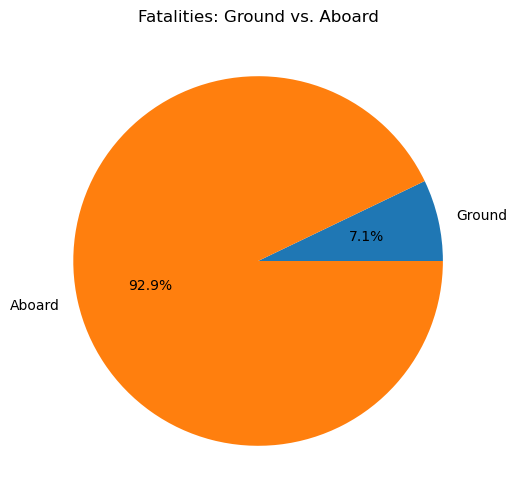

In [48]:
# q5 Ftalities summany
# What percentage of fatalities occurred on the ground vs. aboard?
# instead of able answer with pie graph
import matplotlib.pyplot as plt
ground_total = df['Ground'].sum()
aboard_total = df['Fatalities_(air)'].sum()
percentages = [ground_total, aboard_total]




# 6. Fatalities Ground vs. Aboard
# =============================
ground_total = df['Ground'].sum()
aboard_total = df['Fatalities_(air)'].sum()
plt.figure(figsize=(6,6))
plt.pie([ground_total, aboard_total], labels=['Ground', 'Aboard'], autopct='%1.1f%%')
plt.title('Fatalities: Ground vs. Aboard')
plt.show()

In [49]:
#Q6 survival rate over time -- by year
df['SurvivalRate'] = (df['Aboard'] - df['Fatalities_(air)']) / df['Aboard']
survival_rate = df.groupby('Year')['SurvivalRate'].mean().sort_values(ascending=False)

print(survival_rate)


Year
2024    0.575101
1908    0.500000
1956    0.305326
1915    0.292683
2007    0.287123
          ...   
1909    0.000000
1924    0.000000
1918    0.000000
1912    0.000000
2023    0.000000
Name: SurvivalRate, Length: 114, dtype: float64


In [50]:
# 7.. Top 10 locations with the most accidents

q6 = df['Location'].value_counts().head(10)
print(q6)

Location
Moscow Russia            16
New York                 15
Manila Philippines       15
Rio de Janeiro Brazil    14
Cairo Egypt              13
Sao Paulo Brazil         13
Bogota Colombia          12
Near Moscow Russia       11
Chicago Illinois         10
Tehran Iran              10
Name: count, dtype: int64


In [51]:
# 8. Top operators with the most accidents
# =========================
q7 = df['Operator'].value_counts().head(10)
print(q7)

Operator
Unspecified                            232
Aeroflot                               188
Force Air U.S. - Military               92
Lufthansa Deutsche                      57
France Air                              56
Lines Air United                        37
Corporation Aviation National China     37
Airlines Indian                         32
Airways World American Pan              29
Forces Air Army U.S. - Military         29
Name: count, dtype: int64


In [52]:
# 9. accident trend by quater 
# =========================
accidents_per_quarter = df['Quarter'].value_counts().sort_index()

print("\nAccidents per Quarter:\n", accidents_per_quarter)



Accidents per Quarter:
 Quarter
Qtr 1    1254
Qtr 2    1073
Qtr 3    1332
Qtr 4    1367
Name: count, dtype: int64


In [53]:
## Question 10
import pandas as pd



# Create Decade column
df['Decade'] = (df['Year'] // 10) * 10

# Calculate unique manufacturers and total accidents per decade
result = (
    df.groupby('Decade')
    .agg(
        Unique_Manufacturers=('Aircraft_Manufacturer', 'nunique'),
        Total_Accidents=('Aircraft_Manufacturer', 'count')
    )
    .reset_index()
)

print(result)


    Decade  Unique_Manufacturers  Total_Accidents
0     1900                     2                2
1     1910                     9               30
2     1920                    62              182
3     1930                   111              361
4     1940                   103              581
5     1950                   108              647
6     1960                   103              652
7     1970                    91              612
8     1980                   112              552
9     1990                   110              632
10    2000                   137              507
11    2010                    83              238
12    2020                    19               30


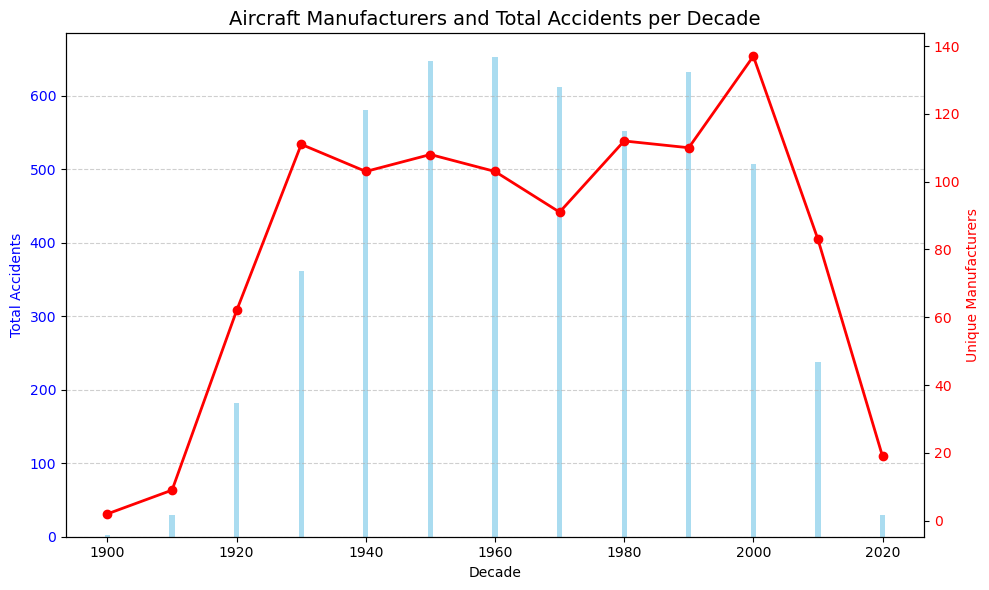

In [55]:
#### Graph 10

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result' is the dataframe from earlier
# Columns: Decade, Unique_Manufacturers, Total_Accidents

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for Total Accidents
ax1.bar(result['Decade'], result['Total_Accidents'], 
        color='skyblue', alpha=0.7, label='Total Accidents')
ax1.set_xlabel("Decade")
ax1.set_ylabel("Total Accidents", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis for Unique Manufacturers
ax2 = ax1.twinx()
ax2.plot(result['Decade'], result['Unique_Manufacturers'], 
         color='red', marker='o', linewidth=2, label='Unique Manufacturers')
ax2.set_ylabel("Unique Manufacturers", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title("Aircraft Manufacturers and Total Accidents per Decade", fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()
